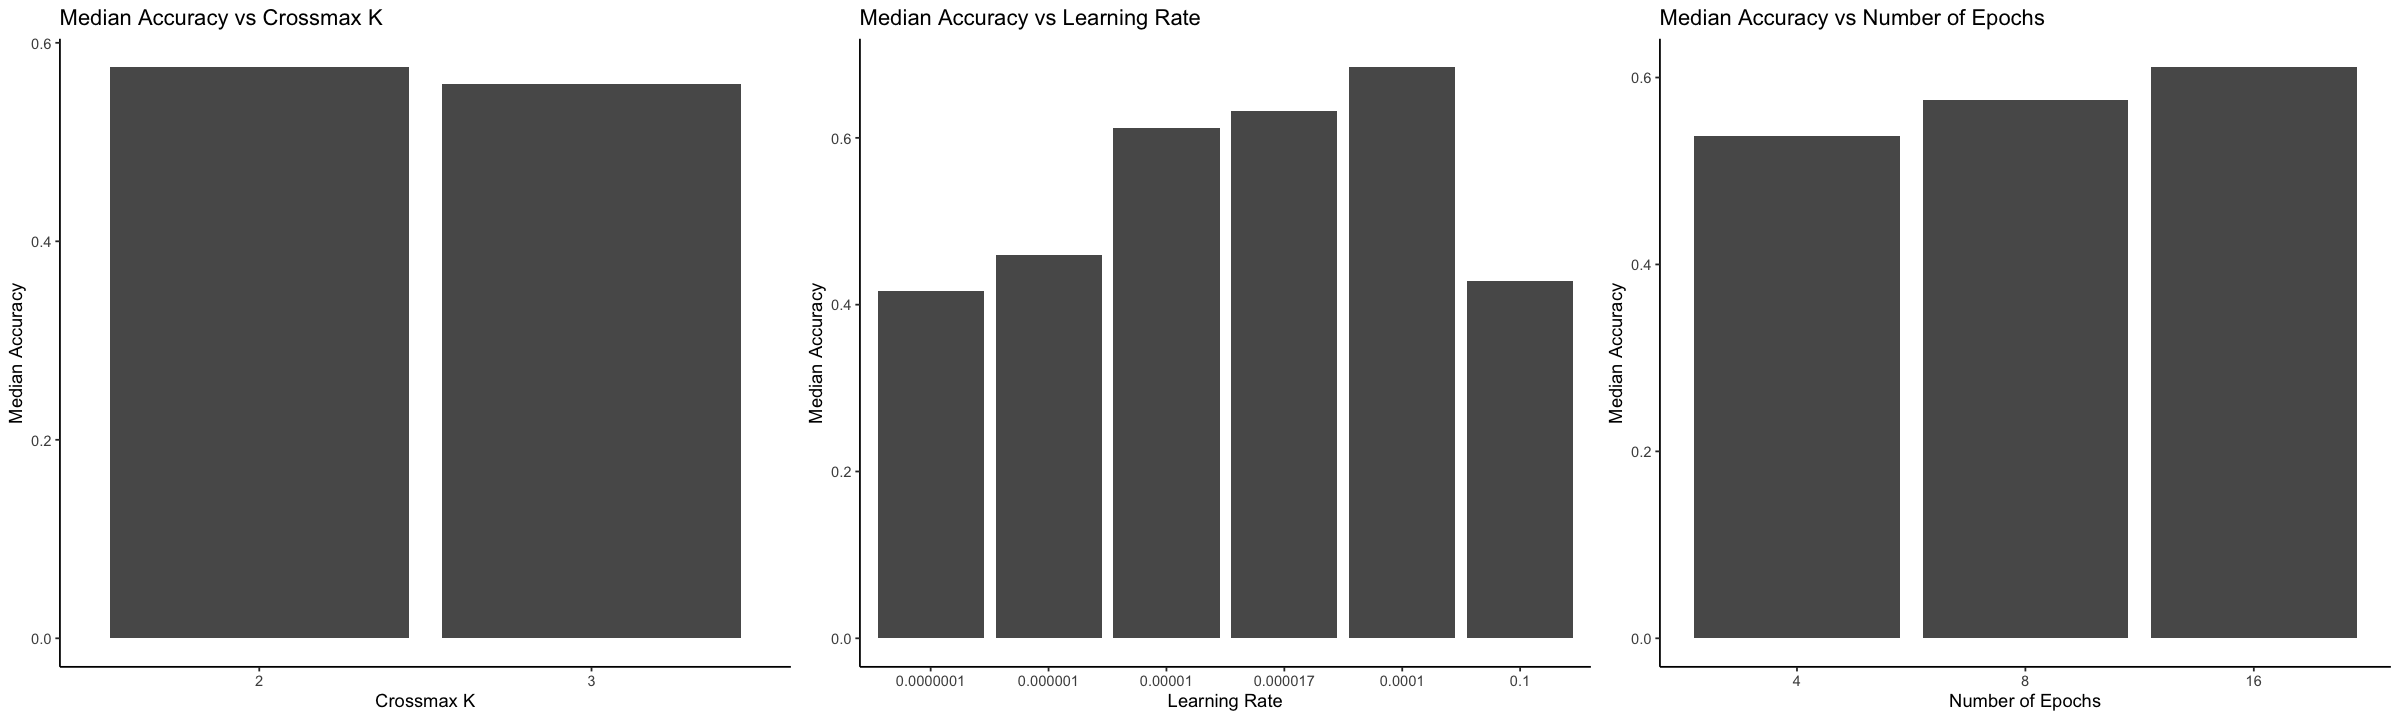

In [ ]:
deps <- c("ISLR", "ndjson", "ggplot2", "dplyr", "caret", "tidyr", "gridExtra", "data.table", "repr")
for (p in deps) {
    if (!requireNamespace(p, quietly = TRUE)) {
        install.packages(p, repos = "https://cran.rstudio.com")
    }
    library(p, character.only = TRUE)
}
options(scipen=999)
options(repr.plot.width=20, repr.plot.height=6)

df <- ndjson::stream_in("./hyperparams.jsonl")

p1 <- df %>%
    group_by(config.crossmax_k) %>%
    summarise(median_accuracy = median(accuracy)) %>%
    ggplot(aes(x=factor(config.crossmax_k), y=median_accuracy)) +
    geom_bar(stat="identity") +
    labs(title="Median Accuracy vs Crossmax K", x="Crossmax K", y="Median Accuracy") + 
    theme_classic()

p2 <- df %>%
    group_by(config.lr) %>%
    summarise(median_accuracy = median(accuracy)) %>%
    ggplot(aes(x=factor(config.lr), y=median_accuracy)) +
    geom_bar(stat="identity") +
    labs(title="Median Accuracy vs Learning Rate", x="Learning Rate", y="Median Accuracy") +
    theme_classic()

p3 <- df %>%
    group_by(config.num_epochs) %>%
    summarise(median_accuracy = median(accuracy)) %>%
    ggplot(aes(x=factor(config.num_epochs), y=median_accuracy)) +
    geom_bar(stat="identity") +
    labs(title="Median Accuracy vs Number of Epochs", x="Number of Epochs", y="Median Accuracy") +
    theme_classic()

grid.arrange(p1, p2, p3, ncol=3)

# ggsave("hyperparams.pdf", arrangeGrob(p1, p2, p3, ncol=3), width=20, height=6)


best results:

```plaintext
{
    "lr": 1e-4,
    "num_epochs": 16,
    "crossmax_k": 2,
}
```

more epochs would probably increase perf by just <1%. so this should be fine.

k=2 is the best value for both datasets (cifar10 k=3 is just better by 0.1% so it's not too important).